In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
import os 
os.chdir(r"C:\Users\sahik\Documents\MAKINE_OGRENMESI\DATA")

In [3]:
df = pd.read_csv("homeprices.csv", sep=";")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
%matplotlib inline

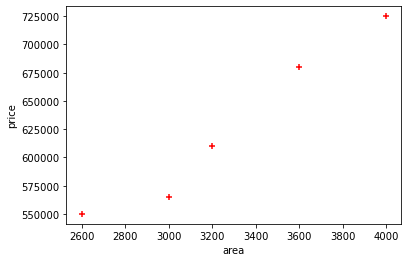

In [5]:
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(df.area, df.price, c="red", marker="+");

In [6]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [7]:
reg.predict([[3300]])

array([628715.75342466])

In [8]:
reg.coef_

array([135.78767123])

In [9]:
reg.intercept_

180616.43835616432

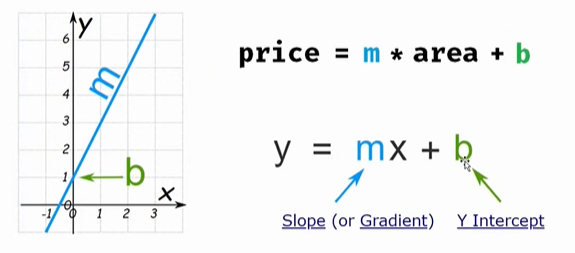

Herhangi bir lineer denklem için bir eğim ve kesişim vardır.
* m değerini (eğim) bulmak için **"coef_"** ifadesini kullanıyoruz.
* b değerini (kesişim) bulmak için **"intercept_"** ifadesini kullanıyoruz.

**y = mx + b** denklemimizin doğruluğunu bulduğumuz değerler ile kontrol edelim.
* Çıkan sonuç ".predict( [[3300]] )" tahmin fonksiyonu ile aynı sonucu verecektir.

In [10]:
135.78767123 * 3300 + 180616.43835616432

628715.7534151643

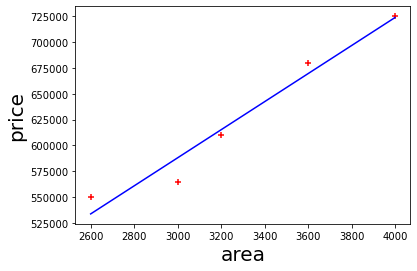

In [11]:
%matplotlib inline
plt.xlabel("area", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.scatter(df.area, df.price, color = "red", marker = "+")
plt.plot(df.area, reg.predict(df[["area"]]), color = "blue");
# "reg.predict(df[["area"]])" :  alan değerlerini verip tahmini fiyat çıktıları oluşturduk.

Şimdiye kadar yaptığımız işlem adımlarında alanı(ev boyutunu) bireysel olarak verip tahmini fiyat karşılığını aldık.

**Şimdi ise alanların olduğu bir listeye her bir alana karşılık gelen tahmini fiyat değerini listeleyebileceğimiz bir .csv dosyası oluşturalım.**

In [12]:
d = pd.read_csv("areas.csv", sep=";")
d.head(3)

,area
0,1000
1,1500
2,2300


In [13]:
p = reg.predict(d)

In [14]:
d["prices"] = p

In [15]:
d.to_csv("prediction.csv")
# yeni bir dosya oluşturup tahmini fiyat değerlerinin olduğu yeni bir .csv dosyası oluşturduk.

In [16]:
# dosyayı okutalım ve gözlemleyelim
pr = pd.read_csv("prediction.csv", sep=",")
pr.head()

,Unnamed: 0,area,prices
0,0,1000,316404.109589
1,1,1500,384297.945205
2,2,2300,492928.082192
3,3,3540,661304.794521
4,4,4120,740061.643836


In [17]:
pr.drop("Unnamed: 0", axis=1, inplace=True)

In [18]:
pr.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


### ÖDEV:

1970-2016 yılları arasında Kanada'nın kişi başına düşen gelir veriseti...
> 2020 yılında kişi başına düşen tahmini gelir nedir?

In [19]:
data = pd.read_csv("canada_per_capita_income.csv")
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


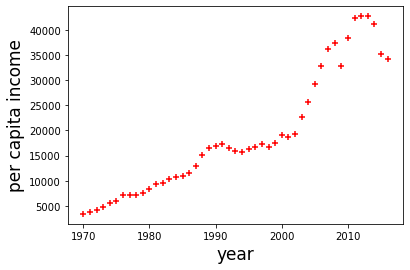

In [20]:
plt.xlabel("year", fontsize = 17)
plt.ylabel("per capita income", fontsize = 17) # kişi başına düşen gelir
plt.scatter(data["year"], data["per capita income (US$)"], marker = "+", color = "red");

In [21]:
rg = linear_model.LinearRegression()
rg.fit(data[["year"]], data["per capita income (US$)"])

LinearRegression()

In [22]:
rg.coef_

array([828.46507522])

In [23]:
rg.intercept_

-1632210.7578554575

In [24]:
rg.predict([[2020]])

array([41288.69409442])

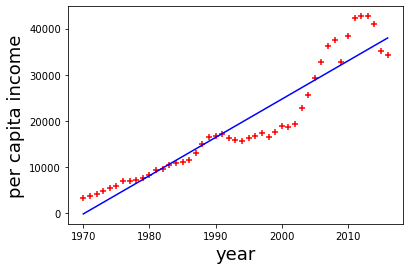

In [25]:
plt.xlabel("year", fontsize = 18)
plt.ylabel("per capita income", fontsize = 18)
plt.scatter(data["year"], data["per capita income (US$)"], marker = "+", color = "red")
plt.plot(data.year, rg.predict(data[["year"]]), color = "blue");

## Save Model Using Joblib And Pickle

Eğitip test ettiğimiz modeli kaydedip bir daha eğitmeden kullanmamızı sağlayan kütüphanelerdir.
* **pickle** modülü, Python nesnelerini serileştirmenizi sağlayan ufak ama güçlü bir kütüphanedir. Yazdıracağımız dosyayı ikili (binary) formatta kullanmalıyız.

*pickle modülü* saklanabilen ve başka programlar tarafından ya da aynı programın farklı çalışma zamanlarında kullanılabilecek Python nesneleri yapmanın standart yoludur. 

In [52]:
import pickle

In [29]:
with open("model_pickle", "wb") as f:
    pickle.dump(reg, f)

Modeli daha sonradan içe aktarmak için, yine ikili (binary) formatta okuma yapıp load fonksiyonuna parametre olarak vermeniz yeterli:

In [31]:
with open("model_pickle", "rb") as f:
    mp = pickle.load(f)

In [35]:
mp.predict([[5000]])

array([859554.79452055])

In [36]:
mp.coef_

array([135.78767123])

In [37]:
mp.intercept_

180616.43835616432

* **joblib** modülü doğrudan Scikit-Learn modellerini serileştirmek için tasarlanmış. Diğer nesne serileştirme modüllerine nazaran, büyük Numpy dizilerini daha verimli bir şekilde taşıyor. Bu modül ile modelinizi serileştirip dosyaya kaydettiğinizde, modelin içindeki tüm Numpy dizileri farklı birer dosyaya kaydediliyor. Bu nedenle, modelin içe aktarılabilmesi için tüm dosyaların  aynı klasörde bulunması şart. Kullanımı diğerlerine göre biraz daha kolay, çünkü dosya oluşturmakla uğraşmıyoruz.

In [46]:
import sklearn.externals
import joblib

In [47]:
joblib.dump(reg, "model_joblib")

['model_joblib']

In [48]:
mj = joblib.load("model_joblib")

In [49]:
mj.predict([[5000]])

array([859554.79452055])

In [50]:
mj.coef_

array([135.78767123])

In [51]:
mj.intercept_

180616.43835616432